In [1]:
pip install numpy matplotlib pandas yfinance pandas_ta tensorflow keras

  Using cached pandas_ta-0.3.14b0-py3-none-any.whl
  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.m

In [23]:
import numpy as np 
import matplotlib as plt
import pandas as pd 
import yfinance as yf
import pandas_ta as ta

In [24]:
ticker_symbol = 'NVDA'

data = yf.download(ticker_symbol, start='2019-05-01', interval='1d')  
data = data.iloc[:-1]
data = data * 10

[*********************100%%**********************]  1 of 1 completed


In [25]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,45.777502,46.202502,45.114999,45.117502,44.811077,3542812400
2019-05-02,45.215001,46.217499,44.778752,45.797501,45.486465,3946854000
2019-05-03,45.882502,45.982499,45.132499,45.752501,45.441771,3368234800
2019-05-06,43.874998,45.085001,43.499999,44.962502,44.657140,4221778000
2019-05-07,44.475002,44.475002,42.792501,43.277502,42.983584,5552183200
2019-05-08,43.000002,44.287500,42.880001,43.480000,43.184714,4191661600
2019-05-09,42.785001,42.882500,41.350002,42.547498,42.258525,6602465600
2019-05-10,42.237501,42.897501,40.999999,42.205000,41.918364,5694980400
2019-05-13,40.875001,41.107502,39.452500,39.612501,39.343476,6569127600


In [26]:
data['RSI'] = ta.rsi(data.Close, length=15)
data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close'] - data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target.iloc[i] > 0 else 0 for i in range(len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Date', 'Volume', 'Close'], axis=1, inplace=True)

In [27]:
data.head(10)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,54.115000,54.250002,52.160001,52.106433,52.727984,52.502290,46.683213,43.481000,1.242995,1,51.710496
1,50.467501,51.954999,50.092502,51.710496,50.985052,52.446358,46.786813,43.592709,-0.606236,0,52.148762
2,52.754998,52.979999,52.067499,52.148762,52.834095,52.437657,46.897074,43.708766,-0.595570,0,51.979432
3,52.575002,52.732501,51.877069,51.979432,52.021716,52.413595,47.001786,43.821034,-0.046453,0,52.833548
4,52.880001,53.372502,52.779999,52.833548,55.702789,52.473490,47.121404,43.943172,0.021048,1,52.833548
5,52.812500,53.592501,52.725000,52.833548,55.702789,52.527681,47.238653,44.063693,-0.060725,0,53.284273
6,53.344998,54.015002,52.814999,53.284273,57.670190,52.619807,47.362541,44.188611,0.520959,1,54.120960
7,53.600001,54.390001,53.575001,54.120960,61.105913,52.783159,47.500610,44.323000,1.751828,1,55.796828
8,54.045000,56.199999,53.955002,55.796828,66.875698,53.091191,47.669261,44.477894,-0.270586,0,55.776916
9,56.047502,57.245002,55.454998,55.776916,66.749594,53.367982,47.834177,44.630472,-0.409222,0,56.065779


In [28]:
dataset = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

dataset.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,54.115000,54.250002,52.160001,52.106433,52.727984,52.502290,46.683213,43.481000,1.242995,1,51.710496
1,50.467501,51.954999,50.092502,51.710496,50.985052,52.446358,46.786813,43.592709,-0.606236,0,52.148762
2,52.754998,52.979999,52.067499,52.148762,52.834095,52.437657,46.897074,43.708766,-0.595570,0,51.979432
3,52.575002,52.732501,51.877069,51.979432,52.021716,52.413595,47.001786,43.821034,-0.046453,0,52.833548
4,52.880001,53.372502,52.779999,52.833548,55.702789,52.473490,47.121404,43.943172,0.021048,1,52.833548


In [29]:
from sklearn.preprocessing import MinMaxScaler

# 2-dimensional NumPy Array
sc = MinMaxScaler(feature_range=(0,1))
dataset_scaled = sc.fit_transform(dataset)
print(dataset_scaled)

[[3.60880132e-03 1.95729179e-03 6.18837622e-03 ... 6.62237013e-01
  1.00000000e+00 2.36047872e-03]
 [3.91421718e-04 0.00000000e+00 4.35793698e-03 ... 6.46403060e-01
  0.00000000e+00 2.73332360e-03]
 [2.40917352e-03 8.74170270e-04 6.10648084e-03 ... 6.46494395e-01
  0.00000000e+00 2.58927018e-03]
 ...
 [9.58101283e-01 9.36466978e-01 9.51616146e-01 ... 7.13328591e-01
  1.00000000e+00 9.48930762e-01]
 [9.76580833e-01 9.50112555e-01 9.69694783e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.90439626e-01
  0.00000000e+00 9.87732494e-01]]


In [30]:
X = []
backcandles = 30 # backcandles are days previous in this instance
print(dataset_scaled.shape[0])

for j in range(8):
    X.append([])
    for i in range(backcandles, dataset_scaled.shape[0]):
        X[j].append(dataset_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
        
X, yi =np.array(X), np.array(dataset_scaled[backcandles:,-1])
y=np.reshape(yi, (len(yi), 1))

print(X.shape)
print(y.shape)

1135
(1105, 30, 8)
(1105, 1)


In [31]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

884
(884, 30, 8)
(221, 30, 8)
(884, 1)
(221, 1)


In [32]:
import tensorflow as tf
import keras

from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Input, Activation, concatenate
from keras.callbacks import History

import numpy as np

In [33]:
lstm_input = Input(shape=(backcandles, 8), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3051e-04 - val_loss: 0.0012
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.7592e-05 - val_loss: 0.0012
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1541e-04 - val_loss: 0.0010
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.1541e-05 - val_loss: 0.0010
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.9856e-05 - val_loss: 0.0022
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0163e-04 - val_loss: 9.5059e-04
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0082e-04 - val_loss: 8.8534e-04
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.1854e-05 - val_loss: 0.0013
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.0255e-05 - val_loss: 9.1212e-04
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0553e-04 - val_loss: 8.8578e-04
Epoch 1

In [34]:
y_pred = model.predict(X_test)

for i in range(10):
    print(y_pred[i], y_test[i])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.3492069] [0.33781315]
[0.33887386] [0.34688845]
[0.33730146] [0.34495774]
[0.34312466] [0.34876818]
[0.34339738] [0.35599779]
[0.34784654] [0.35581914]
[0.35343528] [0.35393094]
[0.3550756] [0.33489582]
[0.35339442] [0.33698814]
[0.3353836] [0.33839153]


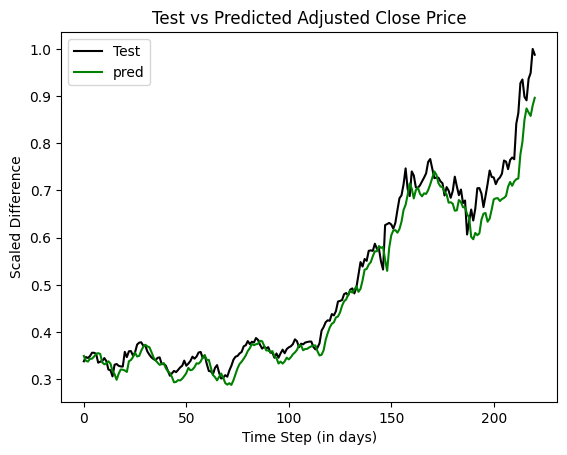

In [35]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.title('Test vs Predicted Adjusted Close Price')
plt.xlabel('Time Step (in days)')
plt.ylabel('Scaled Difference')
plt.show()

In [15]:
X = []
backcandles = 30 # backcandles are days previous in this instance
print(dataset_scaled.shape[0])

for j in range(8):
    X.append([])
    for i in range(backcandles, dataset_scaled.shape[0]):
        X[j].append(dataset_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
        
X, yi =np.array(X), np.array(dataset_scaled[backcandles:,-3])
y=np.reshape(yi, (len(yi), 1))

print(X.shape)
print(y.shape)

1135
(1105, 30, 8)
(1105, 1)


In [16]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

884
(884, 30, 8)
(221, 30, 8)
(884, 1)
(221, 1)


In [17]:
lstm_input = Input(shape=(backcandles, 8), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0845 - val_loss: 0.0375
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - val_loss: 0.0201
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025 - val_loss: 0.0201
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025 - val_loss: 0.0203
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0197
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 0.0197
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026 - val_loss: 0.0199
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023 - val_loss: 0.0197
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026 - val_loss: 0.0206
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026 - val_loss: 0.0196
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026 - val_loss: 0.0203
Epoch 12/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

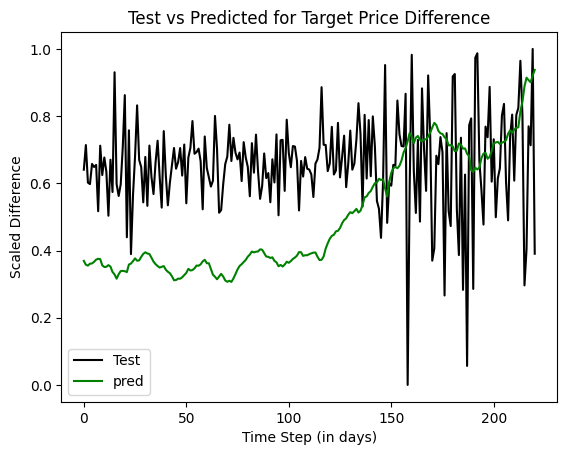

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.title('Test vs Predicted for Target Price Difference')
plt.xlabel('Time Step (in days)')
plt.ylabel('Scaled Difference')
plt.legend()
plt.show()